<a href="https://colab.research.google.com/github/TheFox9711/MLPNS_LVolpi/blob/main/vis/ScatterContours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pylab as pl

!pylab inline

/bin/bash: pylab: command not found


In [3]:
# Per fare i grafici:
from astropy import constants as const
from astropy import units as u

Impostazioni del grafico

In [28]:
opt = {
    'axes.facecolor':           'F1F1F1',
    'figure.facecolor':         'F1F1F1',
    'figure.edgecolor':         'F1F1F1',
    'savefig.facecolor':        'F1F1F1',
    'savefig.edgecolor':        'F1F1F1',

    'axes.labelcolor':          'k',
    'axes.axisbelow':           True,
    'axes.grid':                False,
    
    'xtick.direction':          'in',
    'ytick.direction':          'in',
    'xtick.color':              'k',
    'ytick.color':              'k',
    'xtick.labelsize':          'large',
    'ytick.labelsize':          'large',
    'xtick.top':                True,
    'ytick.right':              True,

    'grid.linestyle':           '-',
    
    'text.color':               'k',
    
    'font.size':                20,
    
    'lines.solid_capstyle':     'round',

    'patch.edgecolor':          'w',
    'patch.force_edgecolor':    True,
    
    'image.cmap':               'viridis',
    'image.interpolation':      'nearest'}

for k in opt.keys():
    pl.rcParams[k] = opt[k]

print(pl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: black
axes.facecolor: #F1F1F1
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: k
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.r

# Raccolta dati

Prendiamo i dati di Kepler-2:

In [24]:
url =   'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI' + \
        '?table=k2targets&select=epic_number,k2_teff,k2_rad&format=CSV'

df = pd.read_csv(url)
df

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN
...,...,...,...
392240,212013249,NaN,NaN
392241,212013281,NaN,NaN
392242,212013289,NaN,NaN
392243,212013297,NaN,NaN


teff è la temperatura effettiva della stella e rad il raggio (in raggi solari, 1 rad è dato da `const.R_sun`), quindi possiamo calcolarne la luminosità:
$$
4 \pi \sigma r^2 T^4
$$

In [26]:
# Aggiungiamo la luminosità in W
df['k2_L'] = 4 * np.pi * const.sigma_sb * (df['k2_rad'] * const.R_sun)**2 * df['k2_teff']**4
df

,epic_number,k2_teff,k2_rad,k2_L
0,60018365,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN
...,...,...,...,...
392240,212013249,NaN,NaN,NaN
392241,212013281,NaN,NaN,NaN
392242,212013289,NaN,NaN,NaN
392243,212013297,NaN,NaN,NaN


# Diagramma HR

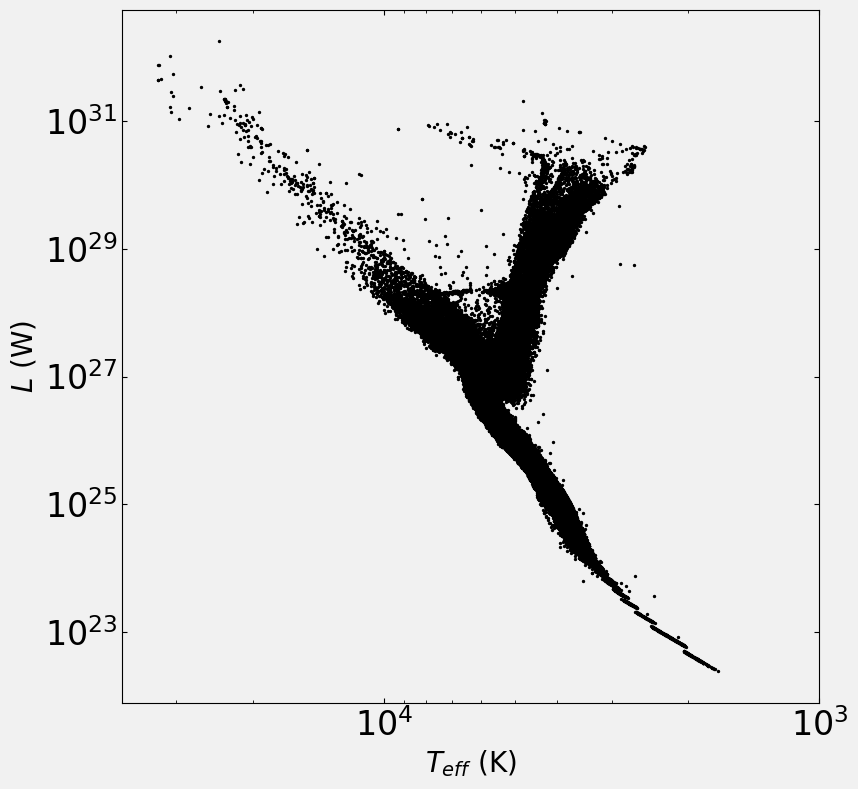

In [34]:
df.plot.scatter(x='k2_teff', y='k2_L', loglog=True, color='k', s=2, figsize=(9,9))
pl.xlim(4e4, 1e3)
pl.xlabel(r'$T_{eff}$ (K)')
pl.ylabel(r'$L$ (W)');

Ci sono troppi punti e non ci si capisce niente. Allora proviamo modificando la trasparenza:

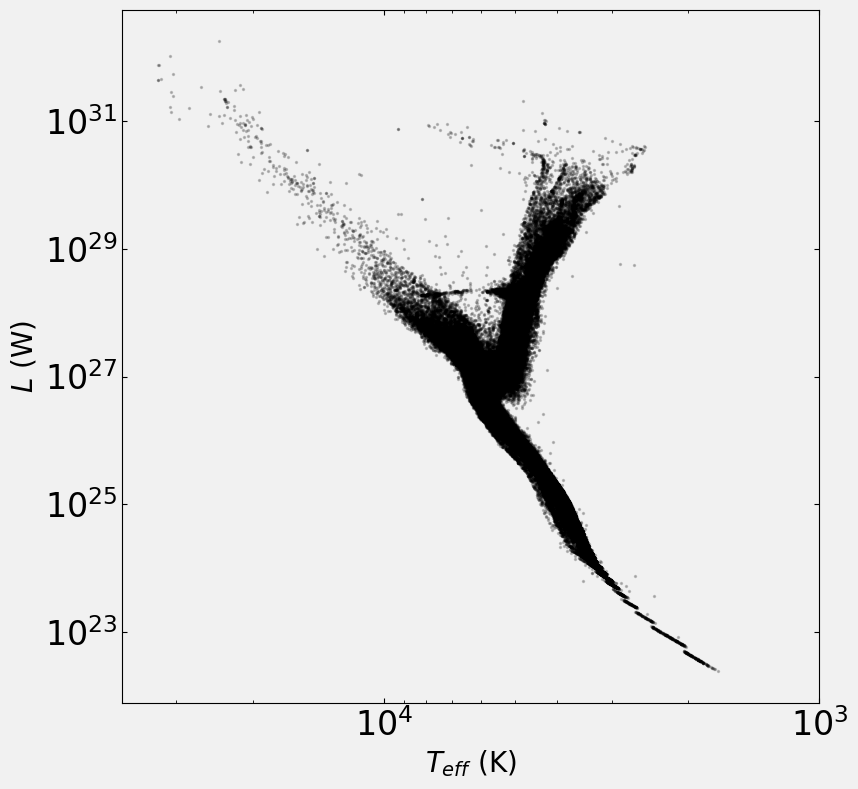

In [35]:
df.plot.scatter(x='k2_teff', y='k2_L', loglog=True, color='k', s=2, figsize=(9,9), alpha=0.2)
pl.xlim(4e4, 1e3)
pl.xlabel(r'$T_{eff}$ (K)')
pl.ylabel(r'$L$ (W)');

# AstroML version

Dobbiamo rimuovere i `NaN` perché la heatmap non funziona con essi:

In [36]:
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

In [37]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.0 MB/s eta 0:00:00


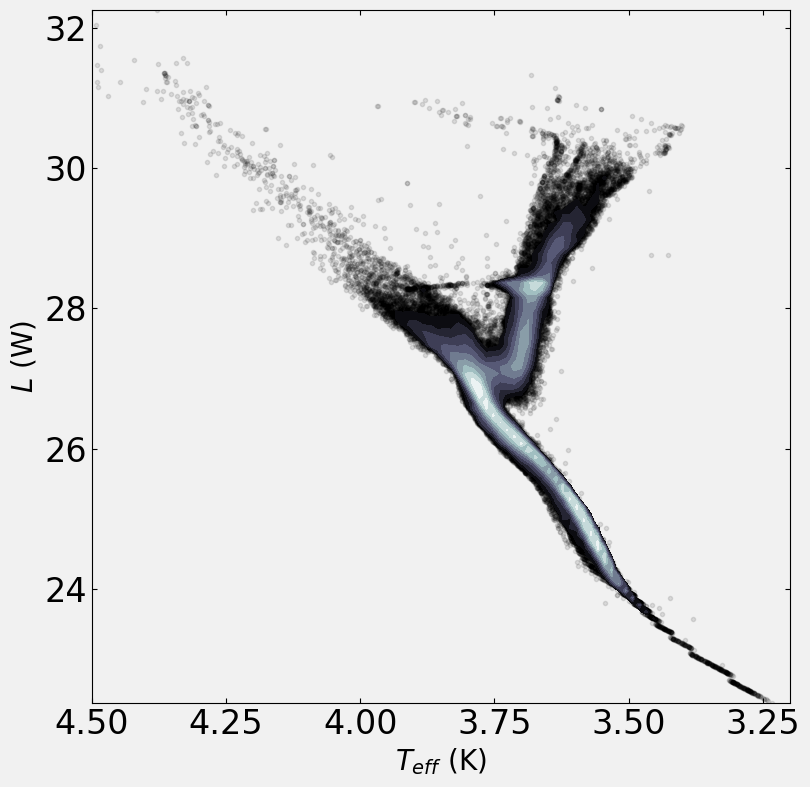

In [40]:
from astroML import plotting


# plotting.scatter_contour visualizza i dati come punti se isolati o come regione colorate quando vicini
ax = pl.figure(figsize=(9,9)).add_subplot()
plotting.scatter_contour(np.log10(teff_na), np.log10(L_na),
                         threshold=50, log_counts=True, filled_contour=True,
                         histogram2d_args=dict(bins=(100,100)),
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))
pl.xlabel(r'$T_{eff}$ (K)')
pl.ylabel(r'$L$ (W)');
pl.xlim(4.5, 3.2)

pl.savefig('k2scatter_contour.png')

# A mano
Possiamo rifare lo stesso tipo di grafico senza `astroML`:

In [41]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(L_na), bins=(40,40))
Hsort = np.sort(H.flatten())

<ipython-input-46-dc05d4f08298>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])


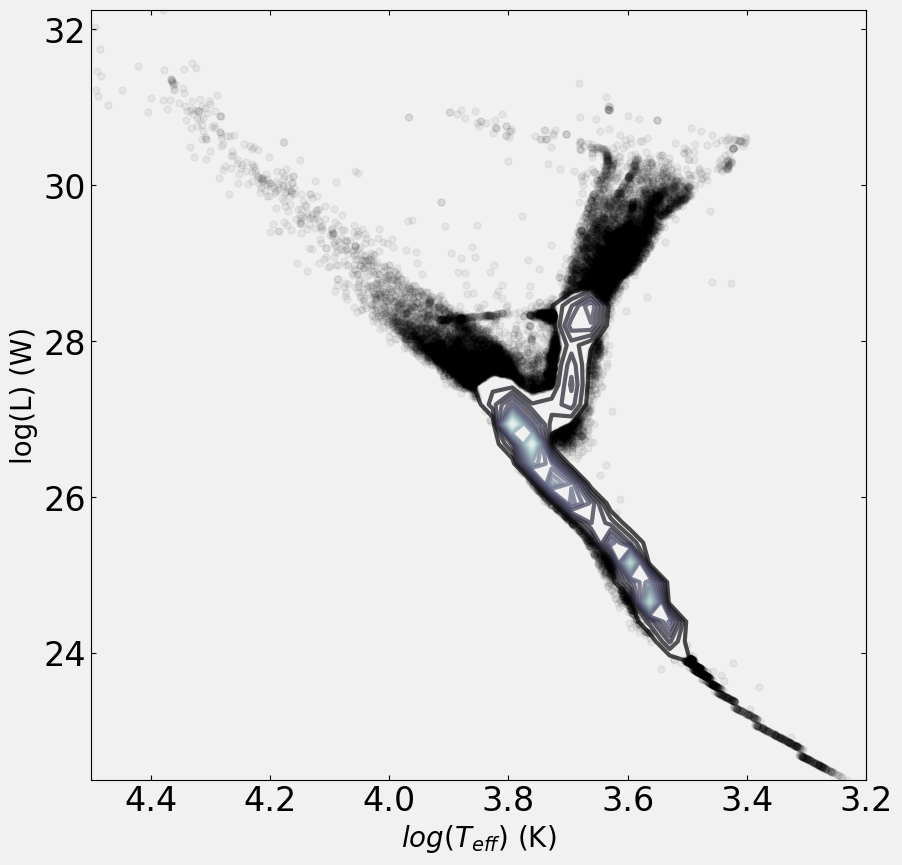

In [46]:
levels = np.linspace(H.max() / 15, H.max(), 15)
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
i_min = np.argmin(levels)

ax = pl.figure(figsize=(10,10)).add_subplot()
outline = ax.contour(H.T, levels[i_min:i_min+1], linewidths=0, extent=extent)

X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]

    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]

else:
    Xplot = X

points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
axc = pl.contour(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='bone', alpha=0.7)

pl.xlim(4.5, 3.2)
pl.ylabel('log(L) (W)')
pl.xlabel(r'$log(T_{eff})$ (K)');